<a href="https://colab.research.google.com/github/Hellrider777/computer_vision_based-cancer-detector/blob/main/Cancer_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mounting Google Drive for accessing the required information.**

In [ ]:
mount('/content/drive/')

#for getting datasets required for testing
#all data sets downloaded from kaggle

NameError: ignored

# **Importing the necessary libraries.**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

## **Rescaling Images**

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

## **Feeding the Dataset**

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/CANCER DATASET/TRAINING' ,
                                           target_size = (200,200),
                                           batch_size = 10,
                                           class_mode = 'binary')

validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/CANCER DATASET/VALIDATION' ,
                                                      target_size = (200,200),
                                                      batch_size = 10,
                                                      class_mode = 'binary')

Found 500 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


# **Training**

In [ ]:
train_dataset.class_indices

{'CANCER': 0, 'NO CANCER': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **Creating layers for the neural network algorithm**

In [ ]:
model  =  tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu' , input_shape = (200,200,3)),
                                      tf.keras.layers.MaxPool2D(2,2),

                                      tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2,2),

                                      tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2,2),

                                      tf.keras.layers.Flatten(),

                                      tf.keras.layers.Dense(512, activation = 'relu'),

                                      tf.keras.layers.Dense(1, activation = 'sigmoid'),
                                      ]
                                      )

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# **Training the neural network with the Data**



In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 10,
                      epochs = 65,
                      validation_data = validation_dataset)



Epoch 1/65
10/10 [==============================] - 8s 710ms/step - loss: 1.5189 - accuracy: 0.6000 - val_loss: 0.4305 - val_accuracy: 0.9800
Epoch 2/65
10/10 [==============================] - 7s 685ms/step - loss: 0.6869 - accuracy: 0.8000 - val_loss: 0.2953 - val_accuracy: 0.8400
Epoch 3/65
10/10 [==============================] - 7s 689ms/step - loss: 0.5896 - accuracy: 0.8400 - val_loss: 0.4989 - val_accuracy: 0.6800
Epoch 4/65
10/10 [==============================] - 7s 684ms/step - loss: 0.1273 - accuracy: 0.9400 - val_loss: 0.0515 - val_accuracy: 0.9867
Epoch 5/65
10/10 [==============================] - 7s 684ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.6750 - val_accuracy: 0.7533
Epoch 6/65
10/10 [==============================] - 7s 694ms/step - loss: 0.9863 - accuracy: 0.8000 - val_loss: 0.3778 - val_accuracy: 0.9667
Epoch 7/65
10/10 [==============================] - 7s 692ms/step - loss: 0.4462 - accuracy: 0.8600 - val_loss: 0.1265 - val_accuracy: 0.9867
Epoch 

# **Finally testing the result**

# **USING A SINGLE IMAGE**

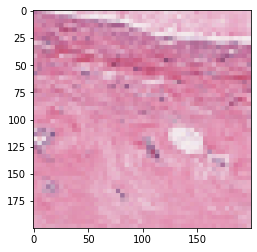

Congratulations. No Cancer is Diagnosed


In [ ]:
img_path = '/content/drive/MyDrive/CANCER DATASET/TESTING/NO CANCER/8867_idx5_x1951_y1201_class0.png'     #path of the image

img = image.load_img(img_path , target_size = (200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
val = model.predict(images)

if val == 1:
  print("Congratulations. No Cancer is Diagnosed")
else:
  print("Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.")

# **USING MULTIPLE IMAGES AT ONCE**

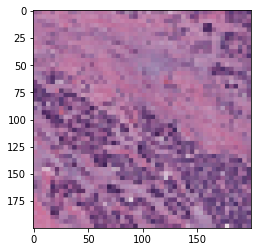

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


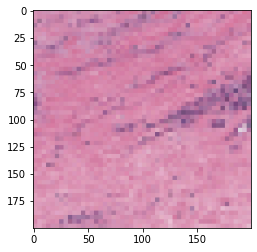

Congratulations. No Cancer is Diagnosed


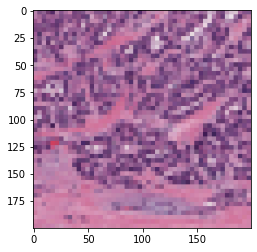

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


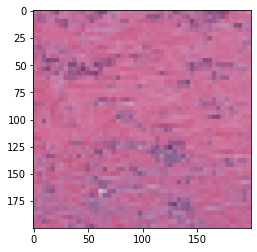

Congratulations. No Cancer is Diagnosed


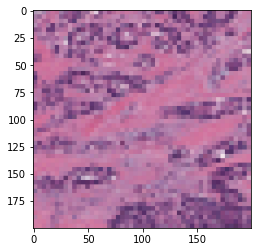

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


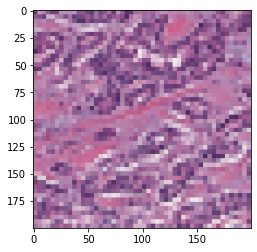

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


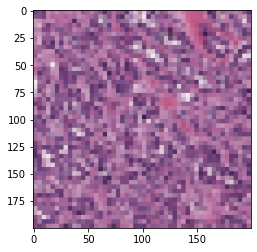

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


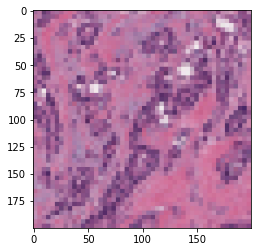

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


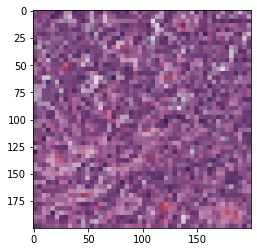

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


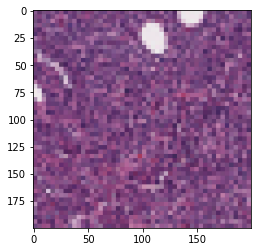

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


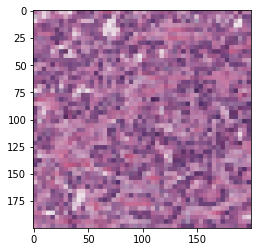

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


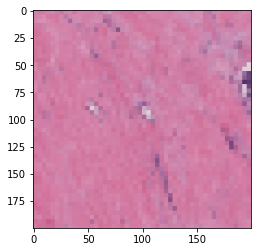

Congratulations. No Cancer is Diagnosed


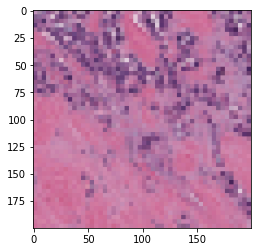

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


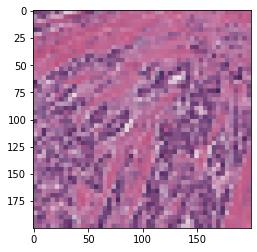

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


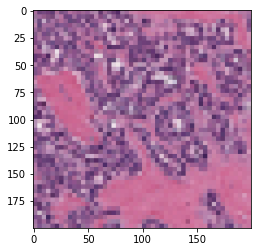

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


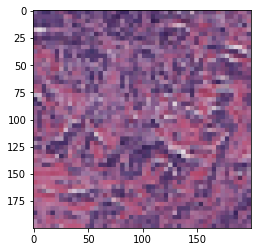

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


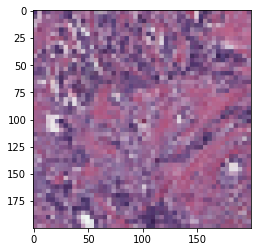

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


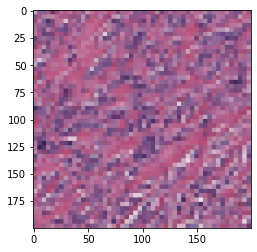

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


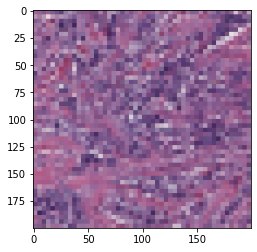

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


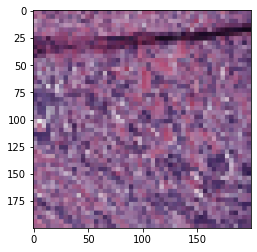

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


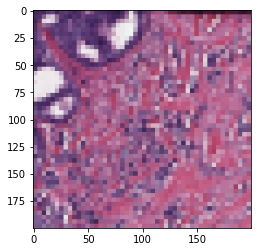

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


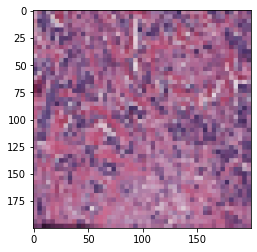

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


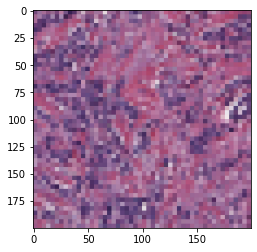

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


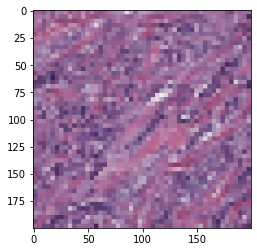

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


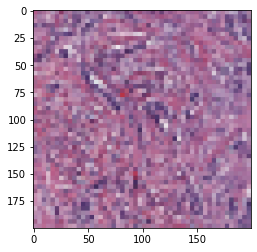

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


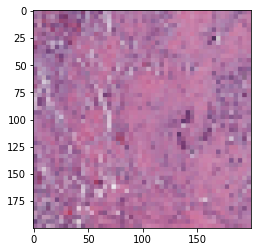

Congratulations. No Cancer is Diagnosed


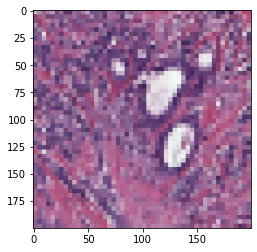

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


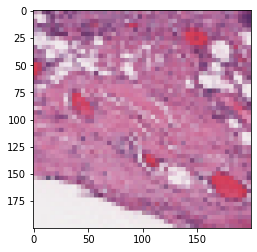

Congratulations. No Cancer is Diagnosed


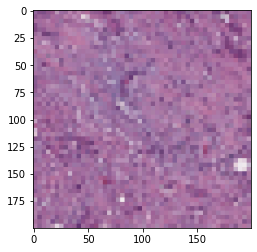

Congratulations. No Cancer is Diagnosed


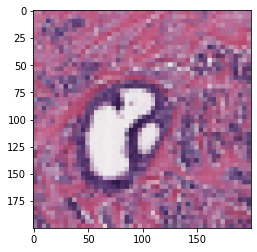

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


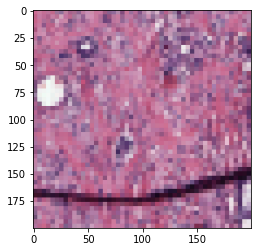

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


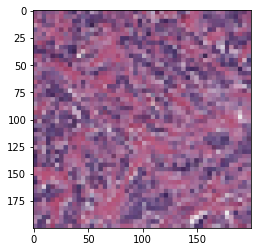

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


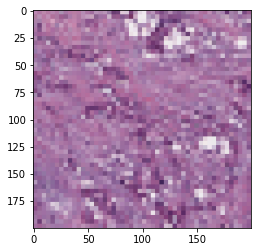

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


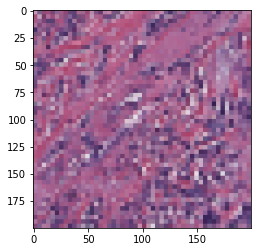

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


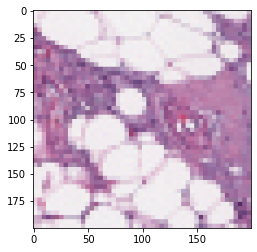

Congratulations. No Cancer is Diagnosed


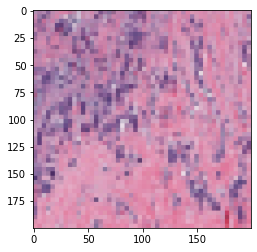

Congratulations. No Cancer is Diagnosed


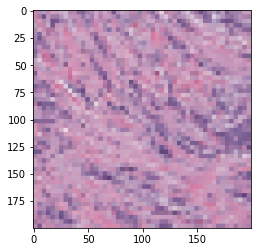

Congratulations. No Cancer is Diagnosed


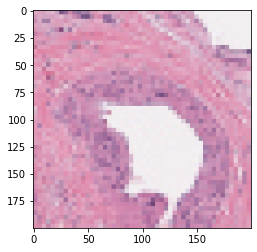

Congratulations. No Cancer is Diagnosed


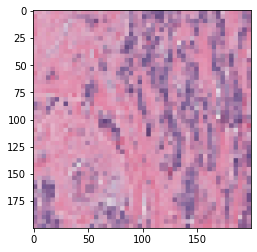

Congratulations. No Cancer is Diagnosed


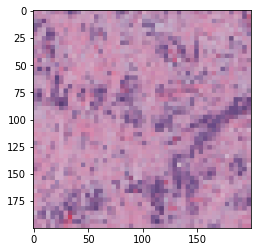

Congratulations. No Cancer is Diagnosed


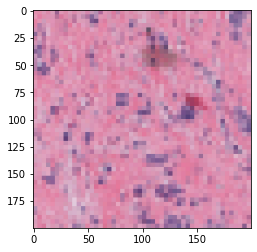

Congratulations. No Cancer is Diagnosed


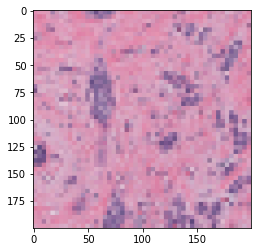

Congratulations. No Cancer is Diagnosed


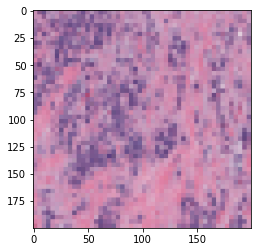

Congratulations. No Cancer is Diagnosed


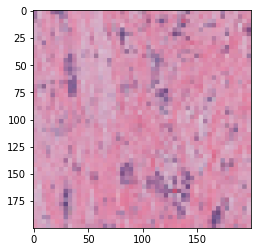

Congratulations. No Cancer is Diagnosed


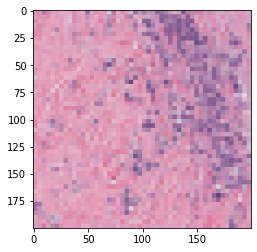

Congratulations. No Cancer is Diagnosed


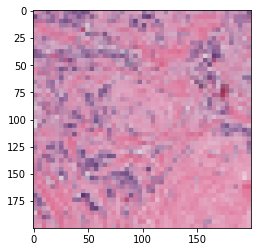

Congratulations. No Cancer is Diagnosed


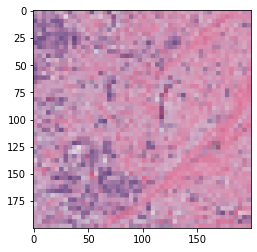

Congratulations. No Cancer is Diagnosed


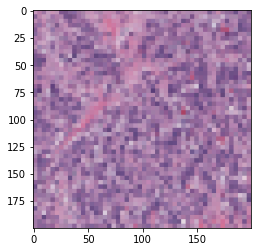

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


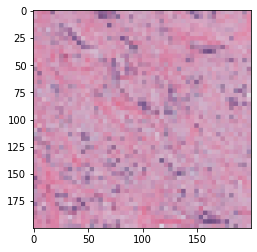

Congratulations. No Cancer is Diagnosed


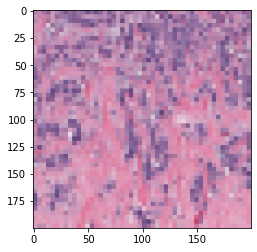

Congratulations. No Cancer is Diagnosed


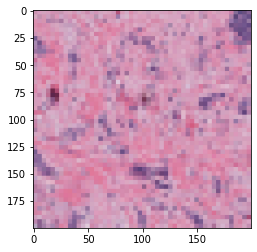

Congratulations. No Cancer is Diagnosed


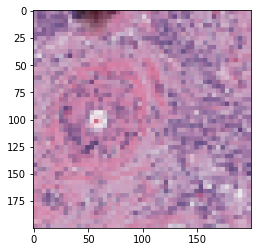

Congratulations. No Cancer is Diagnosed


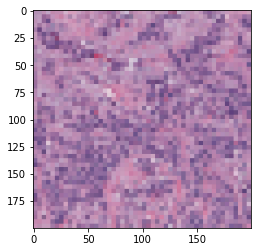

Congratulations. No Cancer is Diagnosed


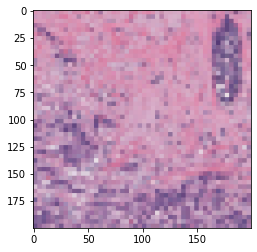

Congratulations. No Cancer is Diagnosed


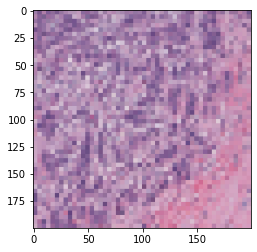

Congratulations. No Cancer is Diagnosed


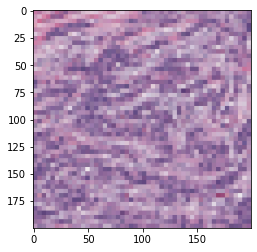

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


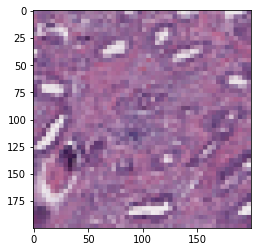

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


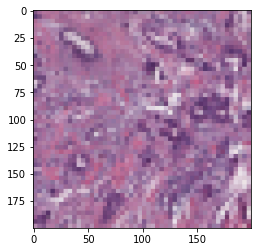

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


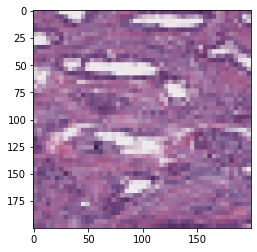

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


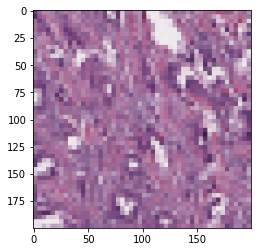

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


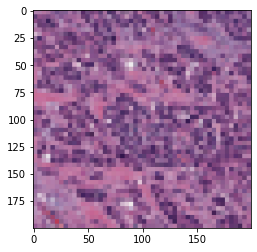

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


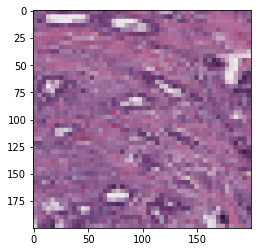

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


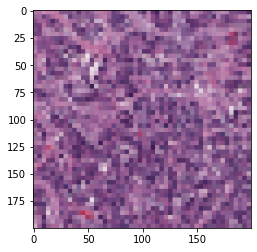

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


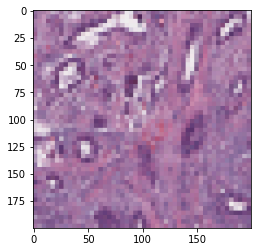

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


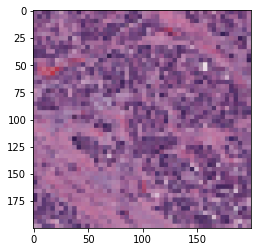

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


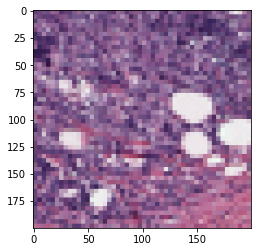

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


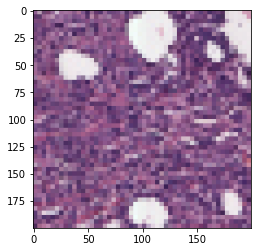

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


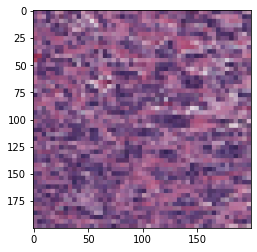

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


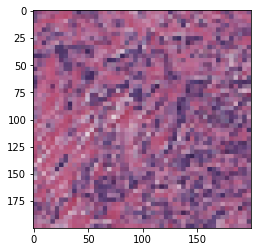

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


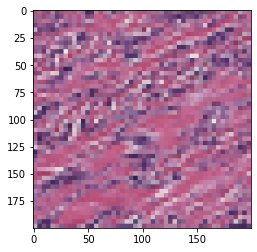

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


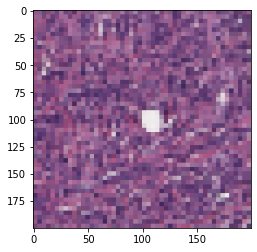

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


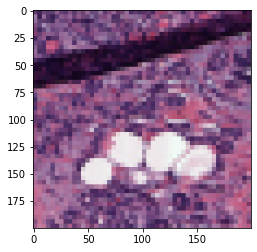

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


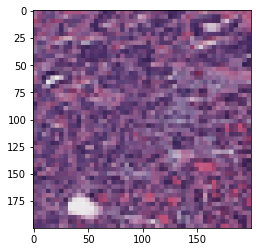

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


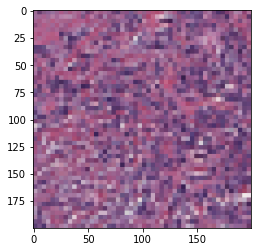

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


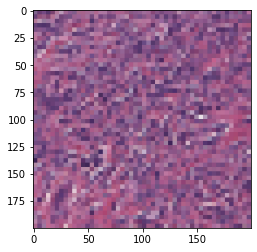

Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.


In [ ]:
dir_path = '/content/drive/MyDrive/CANCER DATASET/TESTING/CANCER'    #path of the images folder

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i , target_size = (200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  val = model.predict(images)

  if val == 1:
    print("Congratulations. No Cancer is Diagnosed")
  else:
    print("Sorry, Cancer diagnosed. Please consult a doctor for confirmation and treatment.")